In [46]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import gs_quant.timeseries as ts
import gs_quant.datetime as dt
from gs_quant.timeseries import Window, beta


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## timeseries

In [16]:
x = ts.generate_series(1000)           # Generate random timeseries with 1000 observations
y = ts.generate_series(1000)

Text(0, 0.5, 'price')

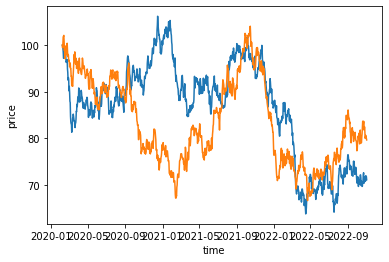

In [23]:
plt.plot(x)
plt.plot(y)
plt.xlabel('time')
plt.ylabel('price')

In [33]:
x_vol = ts.volatility(x, Window(22, 0))  # Compute realized volatility using a window of 22 and a ramp up value of 0
x_vol.head()

2020-02-07         NaN
2020-02-08         NaN
2020-02-09    5.217960
2020-02-10    5.509035
2020-02-11    8.486698
dtype: float64

In [34]:
y_vol = ts.volatility(y, Window(22, 0))
y_vol.head()

2020-02-07          NaN
2020-02-08          NaN
2020-02-09    15.909221
2020-02-10    16.346429
2020-02-11    13.834818
dtype: float64

Text(0, 0.5, 'price vol')

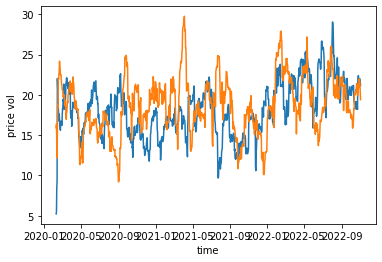

In [29]:
plt.plot(x_vol)
plt.plot(y_vol)
plt.xlabel('time')
plt.ylabel('price vol')

Text(0, 0.5, 'beta')

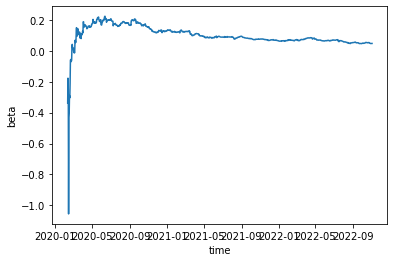

In [53]:
beta = beta(x,y)
plt.plot(beta)
plt.xlabel('time')
plt.ylabel('beta')

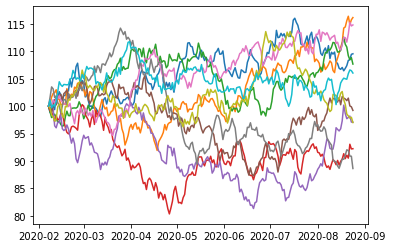

In [54]:
for i in range(10):
    x = ts.generate_series(200)
    plt.plot(x)

In [58]:
end_price = np.array([ts.generate_series(200)[-1] for i in range(10000)])

In [91]:
from scipy.stats import norm
mean,std=norm.fit(end_price)
print('mean= %s, std = %s' %(mean,std))

mean= 99.90741175236799, std = 14.099972778446604


Text(0, 0.5, 'freq.')

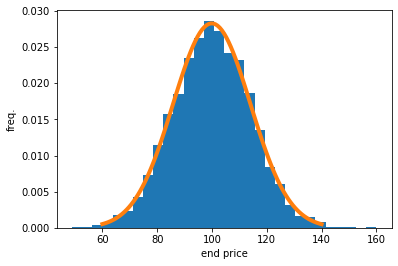

In [99]:
plt.hist(end_price, bins=30, density = True) 

xx = np.linspace(60, 140, 100)
yy = norm.pdf(xx, mean, std)
plt.plot(xx, yy, linewidth = 4)

plt.xlabel('end price')
plt.ylabel('freq.')

## datetime

In [52]:
Jan01 = date(2020, 1, 1)
Feb01 = date(2020, 2, 1)
dt.business_day_count(Jan01, Feb01)

23

In [79]:
dt.is_business_day(Feb01)

False

In [78]:
dt.business_day_offset(Jan01, 22)

datetime.date(2020, 1, 31)

In [82]:
list(dt.date_range(Jan01, Feb01))

[datetime.date(2020, 1, 1),
 datetime.date(2020, 1, 2),
 datetime.date(2020, 1, 3),
 datetime.date(2020, 1, 6),
 datetime.date(2020, 1, 7),
 datetime.date(2020, 1, 8),
 datetime.date(2020, 1, 9),
 datetime.date(2020, 1, 10),
 datetime.date(2020, 1, 13),
 datetime.date(2020, 1, 14),
 datetime.date(2020, 1, 15),
 datetime.date(2020, 1, 16),
 datetime.date(2020, 1, 17),
 datetime.date(2020, 1, 20),
 datetime.date(2020, 1, 21),
 datetime.date(2020, 1, 22),
 datetime.date(2020, 1, 23),
 datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 31)]